In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from lime import lime_tabular
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

pd.set_option('display.max_columns',None)
%matplotlib inline 

# Importing dataset

In [32]:
data_frame = pd.read_csv("../datasets/KDDTrain+.txt")

data_frame.head()


,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [33]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [34]:
#Assigning name for columns
data_frame.columns = columns

In [35]:
data_frame.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [36]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [37]:
data_frame.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [38]:
data_frame.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.0,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.0,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [39]:


data_frame['outcome'] = np.where(data_frame['outcome'] == 'normal', 'normal', 'attack')


# Data Preprocessing

In [40]:
mapping = {"normal": 0, "attack": 1}

data_frame["outcome"] = data_frame["outcome"].map(mapping)

In [41]:
catecorigal_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login']
data_frame.drop(catecorigal_cols, axis=1, inplace=True)

In [42]:
data_frame.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0,15
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1,19
2,0,232,8153,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0,21
3,0,199,420,0,0,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0,21
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1,21


In [43]:
X = data_frame.drop(['outcome'], axis=1)
y = data_frame['outcome']


In [44]:
y = y.astype("int")

In [45]:
std_sclaer = StandardScaler()

x = std_sclaer.fit_transform(X)

In [46]:
dump(std_sclaer, 'train_data/std_scaler.bin', compress=True)


['train_data/std_scaler.bin']

# Feature Selection / Train-Test-Split


In [47]:
pca = PCA(n_components=10)

x = pca.fit_transform(x)

In [48]:
x.shape

(125972, 10)

In [49]:
type(x)

numpy.ndarray

In [50]:
np.save("train_data/scaled_input", x)

In [51]:
n_components = 10

# Get the indices of the original features with the highest loadings in the first 10 principal components
top_feature_indices = np.argsort(np.abs(pca.components_[:n_components]), axis=1)[:, ::-1]

# Map the indices to the original feature names
original_feature_names = X.columns  # Replace with your actual feature names
selected_feature_names = [original_feature_names[i] for i in top_feature_indices.ravel()]

# Print the names of the top 10 selected features
print("Top 10 selected feature names:")
for feature_name in selected_feature_names[:n_components]:
    print(feature_name)

Top 10 selected feature names:
dst_host_serror_rate
dst_host_srv_serror_rate
same_srv_rate
serror_rate
srv_serror_rate
dst_host_same_srv_rate
dst_host_srv_count
count
dst_host_count
srv_diff_host_rate


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
# Fit the scaler on the training data and transform both the training and test sets
scaler = StandardScaler().fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [53]:
# Select a random subset of the scaled training data for LIME
subset_index = np.random.choice(X_train_scaled.shape[0], 1000, replace=False)
z_for_lime = X_train_scaled[subset_index]

# Save the scaled subset for later use in LIME
np.save('z_for_lime.npy', z_for_lime)

NameError: name 'X_train_scaled' is not defined

In [56]:
dump(scaler, "train_data/scaler.joblib")

['train_data/scaler.joblib']

In [57]:
x_train.shape

(100777, 10)

In [58]:
x_test.shape

(25195, 10)

# Training the Model


In [60]:
evals_metrics = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    # Calculate metrics on training and testing sets
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    train_f1 = metrics.f1_score(y_train, model.predict(X_train))
    test_f1 = metrics.f1_score(y_test, model.predict(X_test))

    # Store metrics in a dictionary
    evals_metrics[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]

    #Print and display metrics
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    print("Training F1 Score " + str(name) + " {}  Test F1 Score ".format(train_f1*100) + str(name) + " {}".format(test_f1*100))

    #Display confusion matrix
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 99.67850764040485
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 99.61922491115249
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 99.69514776865103
Training F1 Score DecisionTreeClassifier 100.0  Test F1 Score DecisionTreeClassifier 99.65717187962923


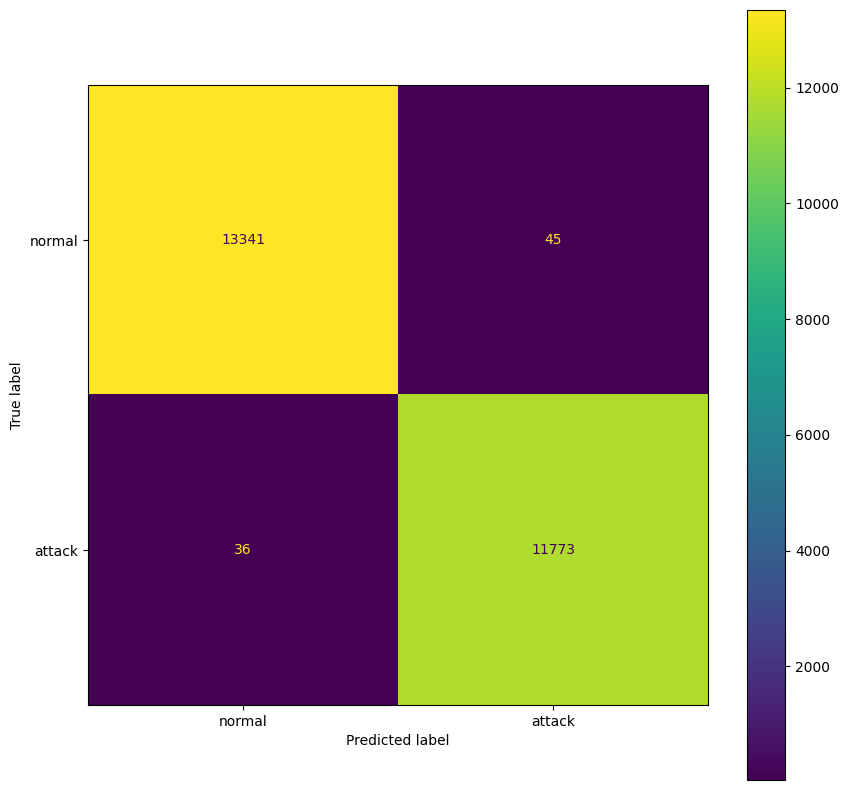

In [61]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
evaluate_classification(model, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

# Saving the model

In [62]:
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

# Evaluating with Test dataset


In [63]:
df = pd.read_csv("../datasets/KDDTest-21.txt")

df.head()

,13,tcp,telnet,SF,118,2425,0,0.1,0.2,0.3,0.4,1,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.13,0.14,0.15,1.1,1.2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,26,10,0.38,0.12,0.04,0.00.6,0.00.7,0.00.8,0.12.1,0.30,guess_passwd,2
0,0,udp,private,SF,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.00,0.75,0.5,0.00,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess,12
1,0,tcp,telnet,S3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable,18
2,0,udp,private,SF,53,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.0,0.00,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal,17
3,0,tcp,private,SH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap,17
4,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,2,9,0.0,0.0,0.5,0.11,1.00,0.0,0.22,255,229,0.90,0.01,0.00,0.0,0.00,0.00,0.01,0.0,back,10


In [64]:
columns_KDD_test = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [65]:
df.columns = columns_KDD_test

In [66]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,private,SF,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.00,0.75,0.5,0.00,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess,12
1,0,tcp,telnet,S3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable,18
2,0,udp,private,SF,53,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.0,0.00,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal,17
3,0,tcp,private,SH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap,17
4,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,2,9,0.0,0.0,0.5,0.11,1.00,0.0,0.22,255,229,0.90,0.01,0.00,0.0,0.00,0.00,0.01,0.0,back,10


In [67]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [68]:
df['outcome'] = np.where(df['outcome'] == 'normal', 'normal', 'attack')

In [69]:
mapping_KDD_test = {"normal": 0, "attack": 1}

df["outcome"] = df["outcome"].map(mapping_KDD_test)

In [70]:
catecorigal_cols_test = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login']
df.drop(catecorigal_cols_test, axis=1, inplace=True)

In [71]:
df.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.00,0.75,0.5,0.00,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,1,12
1,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,1,18
2,0,53,55,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.0,0.00,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,0,17
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,1,17
4,0,54540,8314,0,0,2,0,1,0,0,0,0,0,0,0,2,9,0.0,0.0,0.5,0.11,1.00,0.0,0.22,255,229,0.90,0.01,0.00,0.0,0.00,0.00,0.01,0.0,1,10


In [72]:
X_KDD_Test = df.drop(['outcome'], axis=1)
y_KDD_test = df['outcome']

In [73]:
y_KDD_test = y_KDD_test.astype("int")

In [74]:
std_sclaer_KDD_test = StandardScaler()
x_test_std = std_sclaer_KDD_test.fit_transform(X_KDD_Test)

In [75]:
pca_KDD_test = PCA(n_components=10)

x_test_std = pca_KDD_test.fit_transform(x_test_std)


In [76]:
x_test_std.shape

(11849, 10)

In [77]:
type(x_test_std)

numpy.ndarray

In [78]:
np.save("test_data/scaled_input",x_test_std)

In [79]:
num_components = 10

# Get the indices of the original features with the highest loadings in the first 10 principal components
top_feature_indices_test = np.argsort(np.abs(pca_KDD_test.components_[:num_components]), axis=1)[:, ::-1]

# Map the indices to the original feature names
original_feature_names_test = X_KDD_Test.columns  # Replace with your actual feature names
selected_feature_names_test = [original_feature_names_test[i] for i in top_feature_indices_test.ravel()]

# Print the names of the top 10 selected features
print("Top 10 selected feature names:")
for feature_name in selected_feature_names_test[:num_components]:
    print(feature_name)

Top 10 selected feature names:
dst_host_srv_rerror_rate
dst_host_rerror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
dst_host_same_srv_rate
diff_srv_rate
dst_host_srv_count
dst_host_diff_srv_rate
srv_count


In [80]:
KDD_test_x_train, KDD_test_x_test, KDD_test_y_train, KDD_test_y_test = train_test_split(x_test_std, y_KDD_test, test_size=0.2, random_state=42)

In [81]:
# Fit the scaler on the training data and transform both the training and test sets
scaler_KDD_test = StandardScaler().fit(KDD_test_x_train)
X_train_scaled_test = scaler_KDD_test.transform(KDD_test_x_train)
X_test_scaled_test = scaler_KDD_test.transform(KDD_test_x_test)

In [82]:
dump(scaler_KDD_test, "test_data/scaler.joblib")

['test_data/scaler.joblib']

In [83]:
KDD_test_x_train.shape

(9479, 10)

In [84]:
KDD_test_x_test.shape

(2370, 10)

In [85]:
filename = 'model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 97.34177215189874
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 98.49428868120457
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 98.23925427239773
Training F1 Score DecisionTreeClassifier 100.0  Test F1 Score DecisionTreeClassifier 98.36660617059891


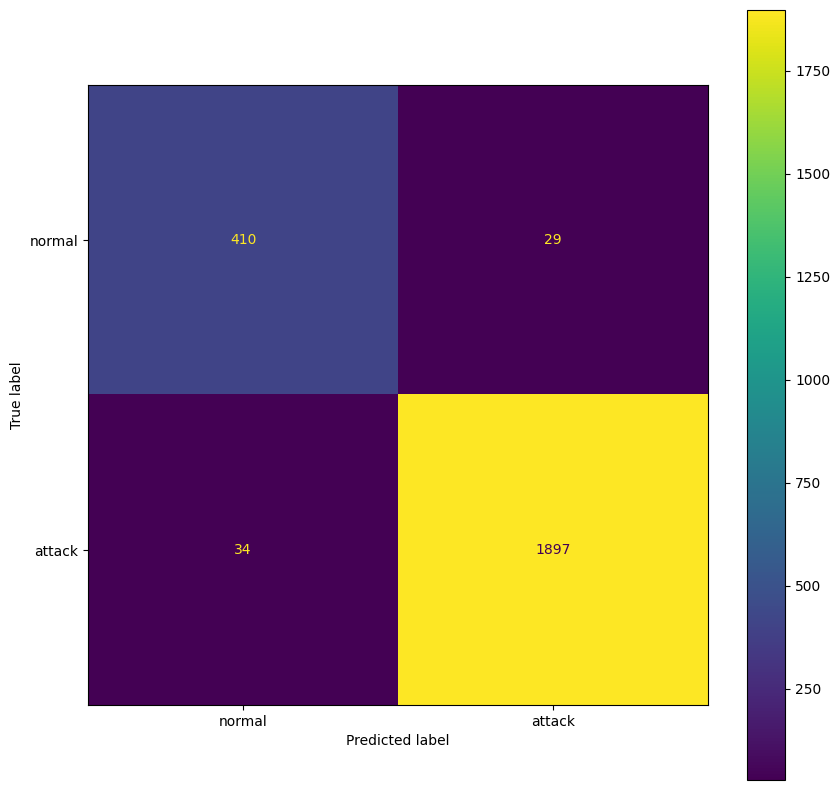

In [88]:
#loaded_model.fit(KDD_test_x_train, KDD_test_y_train)
evaluate_classification(loaded_model, "DecisionTreeClassifier", KDD_test_x_train, KDD_test_x_test, KDD_test_y_train, KDD_test_y_test)

# New prediction

In [1329]:
loaded_model = pickle.load(open(filename, 'rb'))

In [1330]:
selected_features = ['dst_host_srv_rerror_rate',
'dst_host_rerror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'dst_host_same_srv_rate',
'diff_srv_rate',
'dst_host_srv_count',
'dst_host_diff_srv_rate',
'srv_count']

In [1331]:
def predict_with_model(features, loaded_model):
    # Load the saved scaler
    scaler = load("scaler.joblib")

    # Scale the input features using the loaded scaler
    scaled_features = scaler.transform(np.array(features).reshape(1, -1))

    # Make predictions using the loaded decision tree model
    prediction = loaded_model.predict(scaled_features)

    # Load the subset for LIME
    z_for_lime = np.load('z_for_lime.npy')

    # Initialize the LIME explainer with the loaded subset
    explainer = lime_tabular.LimeTabularExplainer(z_for_lime, feature_names=selected_features, class_names=["normal", "attack"])

    # Generate LIME explanation for the given instance
    lime_explanation = explainer.explain_instance(scaled_features[0], loaded_model.predict_proba)

     # Extract and return top contributing features from the LIME explanation
    lime_top_features = lime_explanation.as_list()

    # Return the prediction and the LIME explanation
    return prediction, lime_top_features #lime_explanation


In [1332]:
features = [0.5, 0.3, 0.2, 0.4, 0.7, 0.8, 0.1, 100, 0.6, 50]  #Represents selected_feature columns
input_features = np.array(features).reshape(1, -1)
np.array(features).shape,input_features.shape # Reshapes to show that there is only one datapoint in the dataframe

((10,), (1, 10))

In [1333]:
input_features = [0.5, 0.3, 0.2, 0.4, 0.7, 0.8, 0.1, 100, 0.6, 50]  
model_predictions, lime_explanation = predict_with_model(input_features, loaded_model)

print("Model Predictions:", model_predictions)
print("LIME Explanation", lime_explanation)
#lime_explanation.show_in_notebook(show_table=True, show_all=False)

Model Predictions: [1]
LIME Explanation [('dst_host_diff_srv_rate > 0.11', -0.24202261399792369), ('rerror_rate > 0.06', 0.10528410151125424), ('dst_host_rerror_rate > -0.12', -0.07875570881844442), ('srv_count > 0.24', -0.06907127352130663), ('0.32 < same_srv_rate <= 0.75', -0.059880185478056916), ('dst_host_same_srv_rate > 0.19', 0.03899889446385027), ('-0.01 < diff_srv_rate <= 0.54', 0.037522709741786876), ('dst_host_srv_count > 0.24', 0.018547102214446005), ('-0.45 < dst_host_srv_rerror_rate <= 0.65', 0.017641395490262564), ('0.03 < srv_rerror_rate <= 0.48', 0.014550123724598825)]


In [1334]:
input_features = [0.244, 0.6, 0.67, 0.434, 0.91, 0.4, 0.56, 250, 0.46, 100]  # Replace with your 10 features
model_predictions, lime_explanation = predict_with_model(input_features, loaded_model)

print("Model Predictions:", model_predictions)
print("LIME Explanation", lime_explanation)
#lime_explanation.show_in_notebook(show_table=True, show_all=False)

Model Predictions: [1]
LIME Explanation [('dst_host_diff_srv_rate > 0.11', -0.2810178871433142), ('rerror_rate > 0.06', 0.10616608161577579), ('srv_count > 0.24', -0.08067709473899803), ('0.32 < same_srv_rate <= 0.75', -0.07544464631161572), ('dst_host_same_srv_rate > 0.19', 0.05546362742048393), ('0.03 < srv_rerror_rate <= 0.48', 0.051700245037113596), ('dst_host_rerror_rate > -0.12', -0.037269540511216406), ('dst_host_srv_count > 0.24', 0.03494437134529022), ('-0.45 < dst_host_srv_rerror_rate <= 0.65', 0.025624816566219292), ('-0.01 < diff_srv_rate <= 0.54', 0.006762538106657997)]
